In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from nltk.probability import FreqDist
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_csv('Data_NLP/movie_reviews_v2.csv')
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into ...,7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommende...",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds...",6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came o...",8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from th...",7.0


In [3]:
df.info()
print('\nMissing Values:', df.isna().sum().sum())
print('\nDuplicated Rows:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 405.6+ KB

Missing Values: 1196

Duplicated Rows: 0


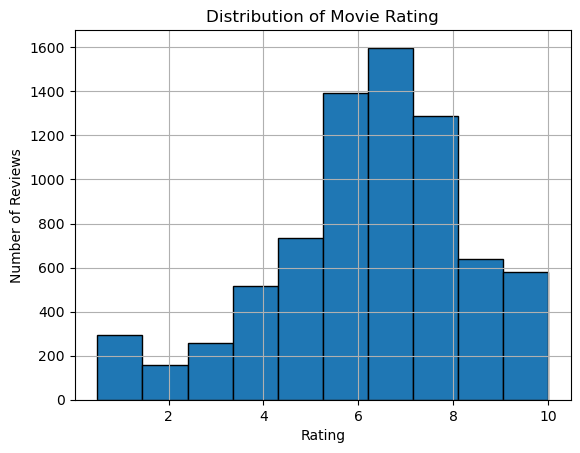

In [4]:
ax = df['rating'].hist(bins=10, edgecolor='black')
ax.set_title('Distribution of Movie Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews');

In [5]:
def create_groups(x):
    if x >= 9:
        return 'High'
    elif x <= 4:
        return 'Low'
    else:
        return None

In [6]:
## Use the function to create a new "rating" column with groups
df['new_rating'] = df['rating'].map(create_groups)
df['new_rating'].value_counts(dropna=False)

None    6231
Low     1224
High    1195
Name: new_rating, dtype: int64

In [7]:
df = df.drop(columns='rating')
df.head()

,review_id,movie_id,imdb_id,original_title,review,new_rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into ...,None
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommende...",High
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds...",None
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came o...",None
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from th...",None


In [8]:
nlp_model = spacy.load("en_core_web_sm", disable=['parser','ner'])
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [9]:
def cleaned_reviews(review, nlp_model, remove_stopwords=True, remove_punct=True, 
                      remove_urls = True, use_lemmas=False):
# Make text into a document
    doc = nlp_model(text)
    
    tokens = [ ]
    
    for token in doc:
        # Check if should remove stopwords and if token is stopword
        if (remove_stopwords == True) and (token.is_stop == True):
            # Continue the loop with the next token
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_punct == True):
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_space == True):
            continue

        ## Adding removing URLs
        if (remove_urls==True) & ('http' in token.text.lower()):
            continue

        if (remove_urls==True) & ('www' in token.text.lower()):
            continue
    
        ## Determine final form of output list of tokens/lemmas
        if use_lemmas:
            tokens.append(token.lemma_.lower())
        else:
            tokens.append(token.text.lower())
    return tokens

In [10]:
df['spacy_tokens'] = df['review'].apply(lambda x:cleaned_reviews(x,nlp_model,use_lemmas=False))
df['spacy_lemmas'] = df['review'].apply(lambda x:cleaned_reviews(x, nlp_model, use_lemmas=True))
df.head()

,review_id,movie_id,imdb_id,original_title,review,new_rating,spacy_tokens,spacy_lemmas
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into ...,None,"[fine, piece, cinema, wong, kar, wai, tells, story, people, circumstance, throws, way, expect, start, couples, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, ...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, hom..."
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommende...",High,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]"
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds...",None,"[roommate, hates, stop, motion, animation, watched, 2018, good, time, maybe, great, remember, thinking, little, kid, holds, degree, final, rating, ★, ★, ★, liked, personally, recommend]","[roommate, hate, stop, motion, animation, watch, 2018, good, time, maybe, great, remember, think, little, kid, hold, degree, final, rating, ★, ★, ★, like, personally, recommend]"
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came o...",None,"[good, stop, motion, animation, <, em>'chicken, run'</em, >, watched, crap, tonne, little, vast, number, years, impressive, production, given, came, 2000, despite, pretty, simple, feel, film, deve...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watch, crap, tonne, little, vast, number, year, impressive, production, give, come, 2000, despite, pretty, simple, feel, film, develop,..."
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from th...",None,"[ok, huge, temptation, riddle, review, puns, going, cracking, little, family, adventure, seemingly, based, range, classic, movies, great, escape, star, trek, love, story, score, cannibalised, writ...","[ok, huge, temptation, riddle, review, pun, go, crack, little, family, adventure, seemingly, base, range, classic, movie, great, escape, star, trek, love, story, score, cannibalise, write, messrs...."


In [11]:
df['tokens_joined'] = df['spacy_tokens'].map(lambda x: " ".join(x))
df['lemmas_joined'] = df['spacy_lemmas'].map(lambda x: " ".join(x))
df.head()

,review_id,movie_id,imdb_id,original_title,review,new_rating,spacy_tokens,spacy_lemmas,tokens_joined,lemmas_joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into ...,None,"[fine, piece, cinema, wong, kar, wai, tells, story, people, circumstance, throws, way, expect, start, couples, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, ...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, hom...",fine piece cinema wong kar wai tells story people circumstance throws way expect start couples new building newspaper man wife business executive wife businessman rarely home journalist wife leave...,fine piece cinema wong kar wai tell story people circumstance throw way expect start couple new building newspaper man wife business executive wife businessman rarely home journalist wife leave in...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommende...",High,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds...",None,"[roommate, hates, stop, motion, animation, watched, 2018, good, time, maybe, great, remember, thinking, little, kid, holds, degree, final, rating, ★, ★, ★, liked, personally, recommend]","[roommate, hate, stop, motion, animation, watch, 2018, good, time, maybe, great, remember, think, little, kid, hold, degree, final, rating, ★, ★, ★, like, personally, recommend]",roommate hates stop motion animation watched 2018 good time maybe great remember thinking little kid holds degree final rating ★ ★ ★ liked personally recommend,roommate hate stop motion animation watch 2018 good time maybe great remember think little kid hold degree final rating ★ ★ ★ like personally recommend
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came o...",None,"[good, stop, motion, animation, <, em>'chicken, run'</em, >, watched, crap, tonne, little, vast, number, years, impressive, production, given, came, 2000, despite, pretty, simple, feel, film, deve...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watch, crap, tonne, little, vast, number, year, impressive, production, give, come, 2000, despite, pretty, simple, feel, film, develop,...",good stop motion animation < em>'chicken run'</em > watched crap tonne little vast number years impressive production given came 2000 despite pretty simple feel film developed concept admittedly s...,good stop motion animation < em>'chicken run'</em > watch crap tonne little vast number year impressive

In [12]:
df.to_csv('Data_NLP/processed_reviews_v2.csv', index=False)

In [13]:
import joblib

joblib.dump(df, 'Data_NLP/processed_reviews_v2.joblib')

['Data_NLP/processed_reviews_v2.joblib']

In [14]:
high = df.loc[df['hi_low_rating'] == 'High']
low = df.loc[df['hi_low_rating'] == 'Low']
print('High Ratings')
display(high.head(3))
print('Low Ratings')
display(low.head(3))

KeyError: 'hi_low_rating'

In [ ]:
high_text_joined = " ".join(high['tokens_joined'])
low_text_joined = " ".join(low['tokens_joined'])

In [ ]:
def plot_wordclouds(high_cloud, low_cloud, title='Comparing Word Usage'):
    """Plots the wordlcouds for our two groups"""
    ## Plot the Images
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    axes[0].imshow(high_cloud)
    axes[0].set_title('High Ratings')
    axes[0].axis('off')
    
    axes[1].imshow(low_cloud)
    axes[1].set_title('Low Ratings')
    axes[1].axis('off')
    fig.tight_layout()
    
    fig.suptitle(title,y=1.0, fontsize='xx-large');
    return fig

In [ ]:
wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(high_text_joined)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(low_text_joined)

fig = plot_wordclouds(high_cloud, low_cloud, title="Original Reviews")

In [ ]:
all_high_lemmas = ' '.join(high['lemmas_joined'])
all_low_lemmas = ' '.join(low['lemmas_joined'])
type(all_high_lemmas)

In [ ]:
## Generate the WordCloud Images
# wordcloud_kws = dict(min_word_length=2,width=800, height=600, )
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(all_high_lemmas)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(all_low_lemmas)

## Plot the Images
fig = plot_wordclouds(high_cloud, low_cloud, title='Comparing Lemmas')

In [ ]:
# Add more custom stopwords for EDA
custom_stopwords = [*STOPWORDS,'movie','film','character','story','good']

In [ ]:
wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42,
                     stopwords=custom_stopwords)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(all_high_lemmas)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(all_low_lemmas)

# ## Plot the Images
fig =  plot_wordclouds(high_cloud,low_cloud, title="Comparing Lemmas - Custom Stopwords")

# Save figure
fig.savefig('Images/wordclouds-original-reviews-custom-stop.png', dpi=300,transparent=False, bbox_inches='tight')

In [ ]:
## Create list of all tokens in all documents
high_tokens = high['spacy_tokens'].explode().to_list()
low_tokens = low['spacy_tokens'].explode().to_list()

In [ ]:
## Instantiate high frequency distribution
high_freq_dist = FreqDist(high_tokens)
low_freq_dist = FreqDist(low_tokens)

high_freq_dist.plot(20, title='High Rating Token Distribution')

low_freq_dist.plot(20, title='Low Rating Token Distribution');

In [ ]:
high_lemmas = high['spacy_lemmas'].explode().to_list()
low_lemmas = low['spacy_lemmas'].explode().to_list()

In [ ]:
## Instantiate high frequency distribution
high_freq_dist = FreqDist(high_lemmas)
low_freq_dist = FreqDist(low_lemmas)

high_freq_dist.plot(20, title='High Rating Lemmas Distribution')

low_freq_dist.plot(20, title='Low Rating Lemmas Distribution');

In [ ]:
## Create measure classes
measures = BigramAssocMeasures()

## Create collector classes
high_finder = BigramCollocationFinder.from_words(high_lemmas)
low_finder = BigramCollocationFinder.from_words(low_lemmas)

In [ ]:
## Calculate high-rating ngram scores
high_ngram_scores = high_finder.score_ngrams(measures.raw_freq)
high_ngram_scores_df = pd.DataFrame(high_ngram_scores, columns=['high ngram', 'high score'])


## Calculate low-rating ngram scores
low_ngram_scores = low_finder.score_ngrams(measures.raw_freq)
low_ngram_scores_df = pd.DataFrame(low_ngram_scores, columns=['low ngram', 'low score'])

## Display the frequency scores
display(high_ngram_scores_df.head(20),low_ngram_scores_df.head(20))

In [ ]:
top_20_ngrams_high = high_ngram_scores_df.set_index("high ngram").head(20)
top_20_ngrams_high

In [ ]:
top_20_ngrams_low = low_ngram_scores_df.set_index("low ngram").head(20)
top_20_ngrams_low

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
## Plot the ngram frequencies
top_20_ngrams_high["high score"].sort_values().plot(
    kind="barh", title="High-Rating Ngram Frequency", ax=axes[0], color="green"
)

top_20_ngrams_low["low score"].sort_values().plot(
    kind="barh", title="Low-Rating Ngram Frequency", color="crimson", ax=axes[1]
)
# Remove lines from top and right edges (spines)
for ax in axes:
    ax.spines["top"].set_visible(False)  # Remove the top spine
    ax.spines["right"].set_visible(False)  # Remove the right spine

fig.tight_layout()
fig.suptitle("Comparing Bigrams", y=1.05, fontsize="xx-large");